# Análise de desempenho - `semaphores`

## Importação das bibliotecas

In [1]:
import subprocess

import matplotlib.pyplot as plt
import pandas as pd

## Criação de DataFrame para os resultados

In [14]:
results_df = pd.DataFrame(columns=[
    "n",
    "p",
    "c",
    "elapsed",
    "mean_elapsed"
])
results_df = pd.read_csv("./data/results.csv", sep=";")

## Execução do programa `semaphores` para diferentes<br>parâmetros de $N$, $P$ e $C$

In [3]:
t = 10

try:
    for n in [1, 2, 4, 16, 32]:
        for p, c in [
            (1, 1),
            (1, 2),
            (1, 4),
            (1, 8),
            (2, 1),
            (4, 1),
            (8, 1)
        ]:
            command = subprocess.getoutput(
                f"./target/release/semaphores -n {n} -p {p} -c {c} -t {t}"
            )
            elapsed = [
                int(i)
                for i in command.splitlines()[-1][1:-1].replace(" ","").split(",")
            ]
            results_df = pd.concat([
                results_df,
                pd.DataFrame([{
                    "n": n,
                    "p": p,
                    "c": c,
                    "elapsed": elapsed,
                    "mean_elapsed": sum(elapsed)/len(elapsed)
                }])
            ])
except Exception:
    print("N:", n, "P:", p, "C:", c)
    print("-"*20)
    print(command)
    print("-"*20)

In [15]:
print(results_df.to_latex(index=False))

\begin{tabular}{rrrlr}
\toprule
 n &  p &  c &                                         elapsed &  mean\_elapsed \\
\midrule
 1 &  1 &  1 &              [3, 3, 17, 3, 10, 9, 9, 9, 10, 10] &           8.3 \\
 1 &  1 &  2 &                  [4, 9, 5, 5, 8, 4, 8, 5, 6, 8] &           6.2 \\
 1 &  1 &  4 &                 [7, 7, 8, 10, 9, 9, 5, 8, 8, 8] &           7.9 \\
 1 &  1 &  8 &            [10, 9, 10, 10, 11, 9, 10, 11, 9, 9] &           9.8 \\
 1 &  2 &  1 &           [15, 25, 25, 7, 7, 9, 12, 14, 12, 13] &          13.9 \\
 1 &  4 &  1 &        [16, 14, 20, 19, 15, 30, 19, 17, 19, 21] &          19.0 \\
 1 &  8 &  1 &        [14, 21, 18, 16, 15, 17, 20, 22, 19, 18] &          18.0 \\
 2 &  1 &  1 &             [3, 13, 6, 27, 29, 3, 3, 4, 27, 11] &          12.6 \\
 2 &  1 &  2 &                  [8, 5, 9, 5, 7, 5, 9, 8, 9, 8] &           7.3 \\
 2 &  1 &  4 &           [11, 8, 9, 10, 10, 10, 10, 10, 9, 10] &           9.7 \\
 2 &  1 &  8 &              [7, 10, 9, 10, 9, 10, 9, 9, 

/tmp/ipykernel_11276/2101732907.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_df.to_latex(index=False))


## Exportação dos resultados

In [4]:
results_df.to_csv("./results.csv", sep=";", index=False)

## Gráfico com resultados

In [11]:
def zero_padding(x):
    if x < 10:
        return f"0{x}"
    return str(x)

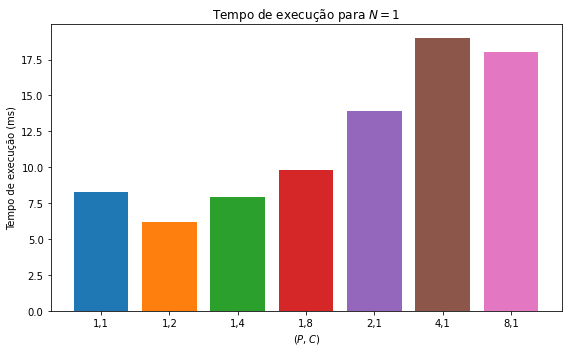

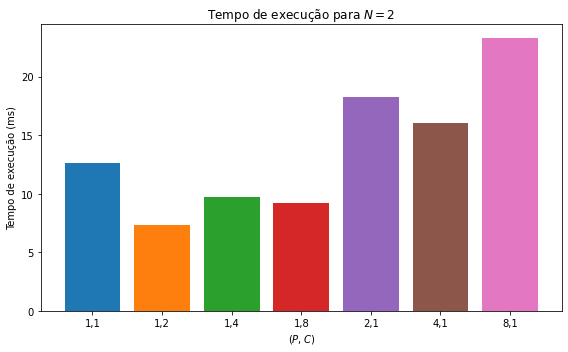

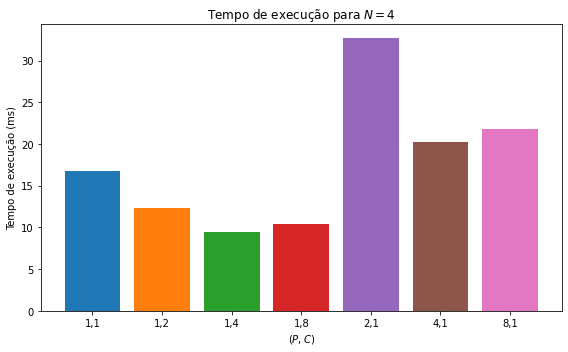

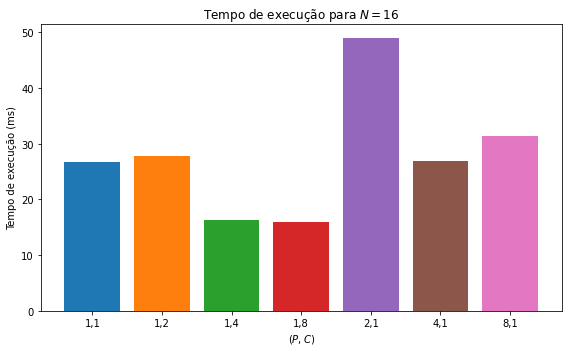

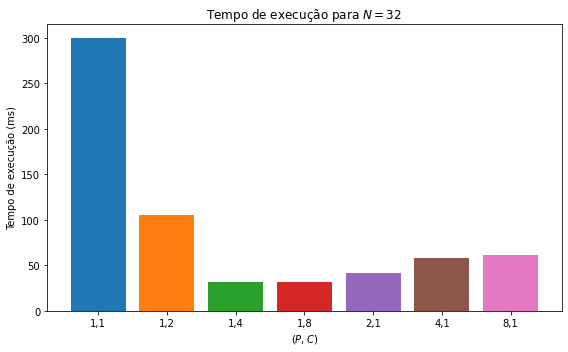

In [16]:
yticks = [
    [5*i for i in range(5)],
    [5*i for i in range(6)],
    [5*i for i in range(8)],
    [10*i for i in range(6)],
    [50*i for i in range(7)]    
]

xlist = sorted(results_df["n"].unique())
for i in range(len(xlist)):
    x = xlist[i]
    fig, ax = plt.subplots(1, figsize=(8,5))
    x_df = results_df.loc[results_df["n"] == x]
    for p, c in x_df[["p", "c"]].itertuples(False, None):
        pc_df = x_df.loc[(x_df["p"] == p) & (x_df["c"] == c)]
        ax.bar(f"{p},{c}", pc_df["mean_elapsed"].iloc[0], label=f"${x}$")
    ax.set_title(f"Tempo de execução para $N={x}$")
    ax.set_xlabel("$(P, C)$")
    ax.set_ylabel("Tempo de execução (ms)")
    # ax.set_yticks(yticks[i])
    fig.tight_layout();
    plt.savefig(f"results_chart_n-{zero_padding(x)}.png", format="png", dpi=300);